#**Importing** **Liberaries**

In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Reading Data From xlsx Sheet

In [114]:
file_loc = "Data (1).xlsx"
df = pd.read_excel(file_loc)

#x(n) signal
x = np.array(df.f7)

#y(n) signal
y = np.array(df.f8)

print(x[0] , y[0])

-42.2676106184863 -14.79492130541703


#Calculate Initial Coeff 

In [115]:
# Adaptation step
mu = 0.00001

# Number o f iterations
num_iterations = 256

results = np.zeros(( num_iterations, 10 ))

In [116]:
#Initialize a0 , a1 , a2 , a3 , a4 , a5
a0 = x[0] / y[0]

a1 = - ( (a0 * y[1]) - x[1] ) / y[0]  

a2 = - ( (a0 * y[2]) +  (a1 * y[1])  - x[2] ) / y[0]

a3 = - ( (a0 * y[3]) + (a1 * y[2]) + (a2 * y[1]) - x[3] ) / y[0]

a4 = - ( (a0 * y[4]) + (a1 * y[3]) + (a2 * y[2]) + (a3 * y[1]) - x[4] ) / y[0]

a5 = - ( (a0 *y [5]) + (a1 *y [4]) + (a2 * y [3]) + (a3 * y [2]) + (a4 * y[1]) - x[5] ) /  y[0]

print(a0 , a1 , a2 , a3 , a4 , a5)

2.856899996014875 0.13941752168334087 0.20780808159652162 0.28854809053157904 0.37759262749405037 0.47098366228626537


#Calculate F8-Hat

In [117]:
for n in range ( num_iterations ) :
    # Boundary condition
    if n == 0 :
       xhat_1 = a0 * y[n]  #F8-hat = coeff F7

    elif n == 1:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1
       xhat_1 = a0 * y[n] + a1 * y[n-1]

    elif n == 2:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1 and a2
       xhat_1 = a0 * y[n] + a1 *y[n-1] + a2 * y[n-2]

    elif n == 3:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1 and a2 and a3
       xhat_1 = a0 * y[n] + a1 * y[n-1] + a2 * y[n-2] + a3 * y[n-3]

    elif n == 4:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1 and a2 and a3 and a4
       xhat_1 = a0 * y[n] + a1 * y[n-1] + a2 * y[n-2] + a3 * y[n-3] + a4 * y[n-4]

    else :
       xhat_1 = a0 *y [n] + a1 *y[n-1] + a2 * y[n-2] + a3 *y[n-3] + a4 * y[n-4] + a5 * y[n-5]

    #Get the error
    e1 = x[n] - xhat_1

     # Add to results matrix
    results [ n , :2 ] = np.array( [ xhat_1 , e1 ] )


In [118]:
for n in range ( num_iterations ) :
    # Boundary condition
    if n == 0 :
       xhat_2 = a0 * y[n]  #F8-hat = coeff F7
    elif n == 1:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1
       xhat_2 = a0 * y[n] + a1 * y[n-1]
    elif n == 2:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1 and a2
       xhat_2 = a0 * y[n] + a1 *y[n-1] + a2 * y[n-2]
    elif n == 3:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1 and a2 and a3
       xhat_2 = a0 * y[n] + a1 * y[n-1] + a2 * y[n-2] + a3 * y[n-3]
    elif n == 4:
       #Get estnmate of x ( xhat ) us ing convolution with a0 and a1 and a2 and a3 and a4
       xhat_2 = a0 * y[n] + a1 * y[n-1] + a2 * y[n-2] + a3 * y[n-3] + a4 * y[n-4]
    else  :
       xhat_2 = a0 *y [n] + a1 * y[n-1] + a2 * y[n-2] + a3 * y[n-3] + a4 * y[n-4] + a5 * y[n-5]


    #Get the error
    e_2 = x[n] - xhat_2

    #Update your filter coeffs
    #Checking f or boundary condition
    if n != 0:
      a0 = a0 + mu * results [n-1 , 1] * y[n-1]

      if n != 1:
        a1 = a1 + mu * results [n-1 , 1]  * y [n-1]

        if n != 2:
          a2 = a2 + mu * results [n-1 , 1]  * y [n-1]

          if n != 3:
            a3 = a3 + mu * results [n-1 , 1]  * y [n-1]

            if n != 4:
              a4 = a4 + mu * results [n-1 , 1]  * y [n-1]

              if n != 5:
                a5 = a5 + mu * results [n-1 , 1]  * y [n-1]


    # Add to results matrix
    results [ n , 2: ] = np.array( [ xhat_2 , e_2 , a0 , a1 , a2 , a3 , a4 , a5 ] )

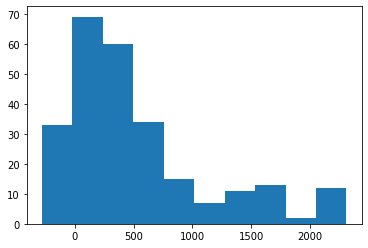

In [119]:
plt.hist(results [ : , 3], 10)

plt.show()